In [1]:
import python_read_net_images as images_set



import os
import re
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import mpldatacursor

import keras
import tensorflow as tf
#import keras.layers as layers
#from keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.layers import Conv2D

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten, Dropout, Activation
from tensorflow.keras.layers import Input,BatchNormalization,Conv2DTranspose
from tensorflow.keras.layers import concatenate



IMG_CHANELS = 6

Using TensorFlow backend.


In [2]:
ImagesDict = images_set.GetFileStruct(r"F:\\SLABO_MULTIRETURN_IMG\\") 
FullMatrix, FullLabelMatrix = images_set.MultiLabelReturnMAtrix(ImagesDict)

F:\\SLABO_MULTIRETURN_IMG\\0 02 25_at_16 06 49_camera-mi_182_LLT
F:\\SLABO_MULTIRETURN_IMG\\0 02 25_at_16 06 49_camera-mi_182_LLT\Fullimg
F:\\SLABO_MULTIRETURN_IMG\\0 02 25_at_16 06 49_camera-mi_182_LLT\FullLabel
F:\\SLABO_MULTIRETURN_IMG\\0 02 25_at_16 06 49_camera-mi_182_LLT\RangeImg
F:\\SLABO_MULTIRETURN_IMG\\0 04 16_at_20 50 48_camera-mi_555_LRT
F:\\SLABO_MULTIRETURN_IMG\\0 04 16_at_20 50 48_camera-mi_555_LRT\Fullimg
F:\\SLABO_MULTIRETURN_IMG\\0 04 16_at_20 50 48_camera-mi_555_LRT\FullLabel
F:\\SLABO_MULTIRETURN_IMG\\0 04 16_at_20 50 48_camera-mi_555_LRT\RangeImg
F:\\SLABO_MULTIRETURN_IMG\\2020 01 29_at_04 18 54_camera-mi_555_LRR
F:\\SLABO_MULTIRETURN_IMG\\2020 01 29_at_04 18 54_camera-mi_555_LRR\Fullimg
F:\\SLABO_MULTIRETURN_IMG\\2020 01 29_at_04 18 54_camera-mi_555_LRR\FullLabel
F:\\SLABO_MULTIRETURN_IMG\\2020 01 29_at_04 18 54_camera-mi_555_LRR\RangeImg
F:\\SLABO_MULTIRETURN_IMG\\2020 01 29_at_05 02 01_camera-mi_555_LRR
F:\\SLABO_MULTIRETURN_IMG\\2020 01 29_at_05 02 01_camera-mi

In [3]:
six_channel_img = FullMatrix   #pass the entire Matrix  0,1,2 -> intensity images while 3,4,5 -> Depth Images
six_channel_img = np.moveaxis(six_channel_img,0,-1) # -> this will move the dimension as N x 32 x128 x Channels

mask_images = FullLabelMatrix[0:3,:,:,:]  # (4,M,32,128)
mask_images = np.moveaxis(mask_images,0,-1) # -> this will move the dimension as N x 32 x128 x Channels
#mask_images = mask_images.reshape(mask_images.shape[0],32, 128,mask_images.shape[-1] ,1)

#mask_images = mask_images.reshape(len(mask_images),32, 128, 1)
print(six_channel_img.shape)
print(mask_images.shape)

(854, 32, 128, 6)
(854, 32, 128, 3)


In [4]:
#Now we have the images, we have the model lets split the set into train set and test set
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
if(IMG_CHANELS == 2):
    (trainX, testX, trainY, testY) = train_test_split(two_channel_img,mask_images, test_size=0.2, random_state=42)
elif(IMG_CHANELS == 4):
    (trainX, testX, trainY, testY) = train_test_split(four_channel_img,mask_images, test_size=0.2, random_state=42)
elif(IMG_CHANELS == 6):
    (trainX, testX, trainY, testY) = train_test_split(six_channel_img,mask_images, test_size=0.2, random_state=42)

In [13]:
load_model = tf.keras.models.load_model('unet_slabo_6chanel_3LabelChannel_dropout-removenormalization_DatasetIncreased_3MultipleOutput_27_01_2021.h5')


img_result_label = load_model.predict(six_channel_img)

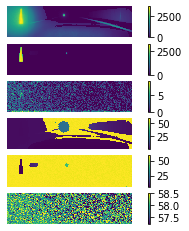

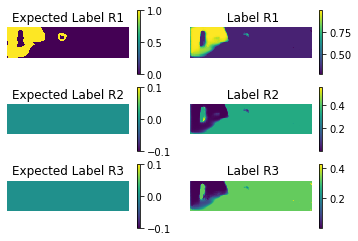

In [12]:
N = 10
L = 0
plt.subplot(6, 1, 1)
plt.imshow(testX[N,:,:,0])
plt.axis('off')
plt.colorbar()
plt.subplot(6, 1, 2)
plt.imshow(testX[N,:,:,1])
plt.axis('off')
plt.colorbar()
plt.subplot(6, 1, 3)
plt.imshow(testX[N,:,:,2])
plt.axis('off')
plt.colorbar()
plt.subplot(6, 1, 4)
plt.imshow(testX[N,:,:,3])
plt.axis('off')
plt.colorbar()
plt.subplot(6, 1, 5)
plt.imshow(testX[N,:,:,4])
plt.axis('off')
plt.colorbar()
plt.subplot(6, 1, 6)
plt.imshow(testX[N,:,:,5])
plt.axis('off')
plt.colorbar()
plt.show()

#-------------------------------------------
plt.subplot(3, 2, 1)
plt.imshow(testY[N,:,:,0])
plt.axis('off')
plt.title('Expected Label R1')
plt.colorbar()

plt.subplot(3, 2, 3)
plt.imshow(testY[N,:,:,1])
plt.axis('off')
plt.title('Expected Label R2')
plt.colorbar()

plt.subplot(3, 2, 5)
plt.imshow(testY[N,:,:,2])
plt.axis('off')
plt.title('Expected Label R3')
plt.colorbar()

plt.subplot(3, 2, 2)
plt.imshow(img_result_label[N,:,:,0])
plt.axis('off')
plt.title(' Label R1')
plt.colorbar()

plt.subplot(3, 2, 4)
plt.imshow(img_result_label[N,:,:,1])
plt.axis('off')
plt.title(' Label R2')
plt.colorbar()

plt.subplot(3, 2, 6)
plt.imshow(img_result_label[N,:,:,2])
plt.axis('off')
plt.title(' Label R3')
plt.colorbar()



plt.show()

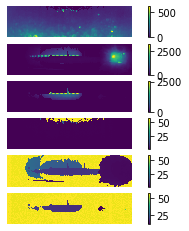

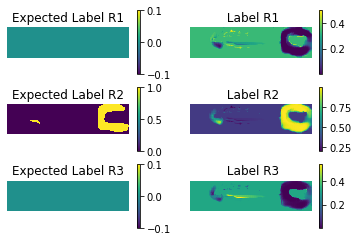

In [14]:
N = 10
L = 0
plt.subplot(6, 1, 1)
plt.imshow(six_channel_img[N,:,:,0])
plt.axis('off')
plt.colorbar()
plt.subplot(6, 1, 2)
plt.imshow(six_channel_img[N,:,:,1])
plt.axis('off')
plt.colorbar()
plt.subplot(6, 1, 3)
plt.imshow(six_channel_img[N,:,:,2])
plt.axis('off')
plt.colorbar()
plt.subplot(6, 1, 4)
plt.imshow(six_channel_img[N,:,:,3])
plt.axis('off')
plt.colorbar()
plt.subplot(6, 1, 5)
plt.imshow(six_channel_img[N,:,:,4])
plt.axis('off')
plt.colorbar()
plt.subplot(6, 1, 6)
plt.imshow(six_channel_img[N,:,:,5])
plt.axis('off')
plt.colorbar()
plt.show()

#-------------------------------------------
plt.subplot(3, 2, 1)
plt.imshow(mask_images[N,:,:,0])
plt.axis('off')
plt.title('Expected Label R1')
plt.colorbar()

plt.subplot(3, 2, 3)
plt.imshow(mask_images[N,:,:,1])
plt.axis('off')
plt.title('Expected Label R2')
plt.colorbar()

plt.subplot(3, 2, 5)
plt.imshow(mask_images[N,:,:,2])
plt.axis('off')
plt.title('Expected Label R3')
plt.colorbar()

plt.subplot(3, 2, 2)
plt.imshow(img_result_label[N,:,:,0])
plt.axis('off')
plt.title(' Label R1')
plt.colorbar()

plt.subplot(3, 2, 4)
plt.imshow(img_result_label[N,:,:,1])
plt.axis('off')
plt.title(' Label R2')
plt.colorbar()

plt.subplot(3, 2, 6)
plt.imshow(img_result_label[N,:,:,2])
plt.axis('off')
plt.title(' Label R3')
plt.colorbar()



plt.show()

In [34]:
#
#from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import img_to_array
# example of brighting image augmentation
#from numpy import expand_dims

#data    = img_to_array(six_channel_img[N,:,:,4])
#datagen = ImageDataGenerator(horizontal_flip=True)
#samples = expand_dims(data, 0)

# prepare iterator
#it = datagen.flow(samples, batch_size=1)
#image = (batch[0].astype('uint8'))
#image = []
# generate samples and plot
#for i in range(9):
	# define subplot
	#pyplot.subplot(330 + 1 + i)
	# generate batch of images
	#batch = it.next()
	# convert to unsigned integers for viewing
	#image.append(batch[0].astype('uint8'))
	# plot raw pixel data
	#pyplot.imshow(image)
# show the figure
#pyplot.show()

#-------------------------------------------------
from PIL import Image, ImageOps
data    = np.squeeze(six_channel_img[N,:,:,4])
im_flip =  np.fliplr(data)


9


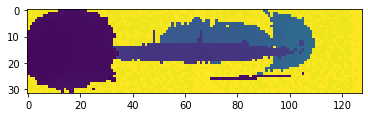

In [35]:
lol = im_flip #np.squeeze(image[1])
print(len(image))
plt.imshow(lol)
plt.show()